# [CS211A] Homework 1 by Aaron Beomjun Bae
Student Number: 49967111<br>
Student ID: beomjuna<br>
Due Date: 11:59pm Wednesday October 23rd

In this homework assignment, I will try to answer the following problems in order:
0. Getting Started
1. Gaussian Pyramid
2. Laplacian Pyramid
3. Multi-Scale Edge Detection
4. Multi-Resolution Spline

## Part 0: Getting Started
Given a 100 X 100 double matrix A representing a grayscale image, write a few lines of Python code to do each of the following. Try to avoid using loops. Also, ylu may find a RGB image or using uint8 pixel format and hence need to transform it before processing. (Useful commands: rgb2gray, im2double, imresize). For this part, you could use an arbitrary
image.



a. Sort all the intensities in A, put the result in a single 10000-dimensional vector x, and plot the values in x.

(256, 256)


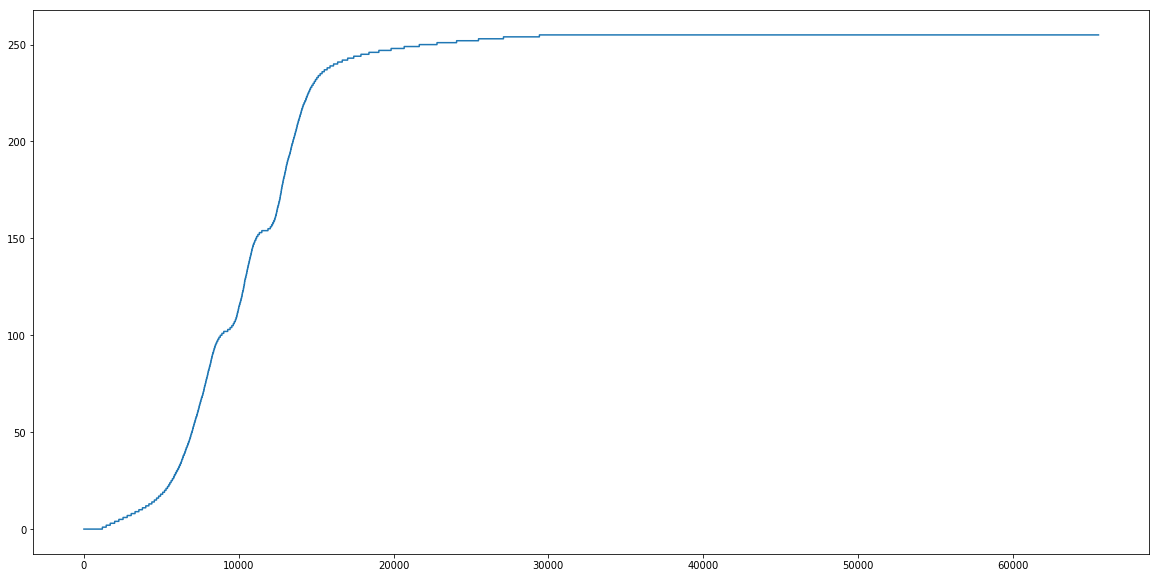

In [24]:
import matplotlib.pyplot as plt
import numpy as np

A = plt.imread("CARTOON.jpg")
print(np.shape(A))
x = np.ravel(A)
x = np.sort(x)
plt.figure(figsize=(20,10))
plt.plot(np.arange(len(x)), x, markersize=0.5)

b. Display a figure showing a histogram of A's intensities with 32 bins.

(array([ 3051.,  1637.,   863.,   562.,   409.,   356.,   292.,   282.,
          290.,   244.,   243.,   300.,   910.,   480.,   261.,   198.,
          222.,   236.,   396.,  1078.,   261.,   195.,   211.,   236.,
          272.,   272.,   285.,   380.,   532.,  1168.,  3717., 45697.]),
 array([  0.     ,   7.96875,  15.9375 ,  23.90625,  31.875  ,  39.84375,
         47.8125 ,  55.78125,  63.75   ,  71.71875,  79.6875 ,  87.65625,
         95.625  , 103.59375, 111.5625 , 119.53125, 127.5    , 135.46875,
        143.4375 , 151.40625, 159.375  , 167.34375, 175.3125 , 183.28125,
        191.25   , 199.21875, 207.1875 , 215.15625, 223.125  , 231.09375,
        239.0625 , 247.03125, 255.     ]),
 <a list of 32 Patch objects>)

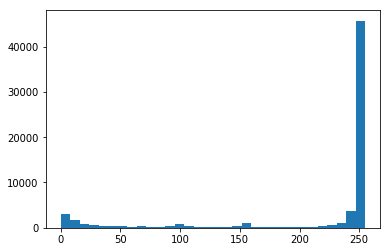

In [29]:
plt.hist(x, bins=32)

c. Create and display a new binary image with the same size as A, which is white wherever the
intensity in A is greater than a threshold t, and black everywhere else

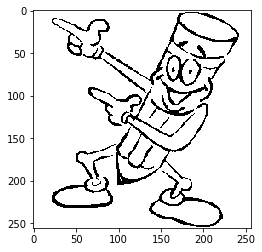

In [41]:
def threshold(A, t): 
    result = np.zeros(A.shape)
    result[A>t] = 255
    return result
    
B = threshold(A, 50)
plt.imshow(B, cmap='gray')

d. Generate a new image (matrix), which has the same size as A, but with A’s mean intensity
value subtracted from each pixel. Set any negative values to 0.


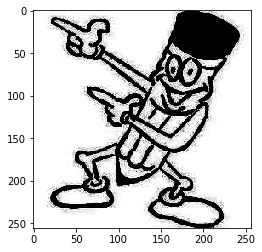

In [46]:
def minusMean(A):
    result = np.array(A, copy=True)
    m = np.mean(result)
    result = result - m
    result[result<0] = 0
    return result
    
C = minusMean(A)
plt.imshow(C, cmap='gray')

e. Let y be the vector: y = [1: 8]. Use the reshape command to form a new matrix s whose first
column is [1, 2, 3, 4]’, and whose second column is [5, 6, 7, 8]’.

In [51]:
y = np.arange(1,9)
s = y.reshape((4, 2))
print(s)

[[1 2]
 [3 4]
 [5 6]
 [7 8]]


f. Create a vector [1, 3, 5 …, 99]. Extract the corresponding pixel from the image in its two
dimensions, i.e., subsample the original image to its half size.

In [76]:
v = np.arange(1,A.shape[0], 2)
print(v)
D = A[::2,::2]
print(D.shape)

[  1   3   5   7   9  11  13  15  17  19  21  23  25  27  29  31  33  35
  37  39  41  43  45  47  49  51  53  55  57  59  61  63  65  67  69  71
  73  75  77  79  81  83  85  87  89  91  93  95  97  99 101 103 105 107
 109 111 113 115 117 119 121 123 125 127 129 131 133 135 137 139 141 143
 145 147 149 151 153 155 157 159 161 163 165 167 169 171 173 175 177 179
 181 183 185 187 189 191 193 195 197 199 201 203 205 207 209 211 213 215
 217 219 221 223 225 227 229 231 233 235 237 239 241 243 245 247 249 251
 253 255]
(128, 128)


g. Use fspecial to create a Gaussian Filter and then apply the imfilter function to the image with
the created Gaussian Filter, by doing so you should see a blurred image. Change three
combinations of parameters of the Gaussian Filter and compare the results.

h. Apply the conv2 instead of imfilter function to the same process (for one Gaussian Filter), do
you see any changes? Why?
